Congratulations – you have been hired as Chief Data Scientist of MedCamp – a not for profit organization dedicated in making health conditions for working professionals better. MedCamp was started because the founders saw their family suffer due to bad work life balance and neglected health.

MedCamp organizes health camps in several cities with low work life balance. They reach out to working people and ask them to register for these health camps. For those who attend, MedCamp provides them facility to undergo health checks or increase awareness by visiting various stalls (depending on the format of camp). 

MedCamp has conducted 65 such events over a period of 4 years and they see a high drop off between “Registration” and Number of people taking tests at the Camps. In last 4 years, they have stored data of ~110,000 registrations they have done.

One of the huge costs in arranging these camps is the amount of inventory you need to carry. If you carry more than required inventory, you incur unnecessarily high costs. On the other hand, if you carry less than required inventory for conducting these medical checks, people end up having bad experience.

Load libraries

In [249]:
#import files
import numpy as np
import pandas as pd

Load datasets

In [250]:
#Load datasets
train=pd.read_csv("https://raw.githubusercontent.com/TracyRenee61/AV-Healthcare-I/master/Train.csv")
test=pd.read_csv("https://raw.githubusercontent.com/TracyRenee61/AV-Healthcare-I/master/test_l0Auv8Q%20-%20test_l0Auv8Q.csv")
sample_sub=pd.read_csv("https://raw.githubusercontent.com/TracyRenee61/AV-Healthcare-I/master/sample_submmission%20-%20sample_submmission.csv")
first=pd.read_csv("https://raw.githubusercontent.com/TracyRenee61/AV-Healthcare-I/master/First_Health_Camp_Attended.csv")
second=pd.read_csv("https://raw.githubusercontent.com/TracyRenee61/AV-Healthcare-I/master/Second_Health_Camp_Attended.csv")
third=pd.read_csv("https://raw.githubusercontent.com/TracyRenee61/AV-Healthcare-I/master/Third_Health_Camp_Attended.csv")
camp=pd.read_csv("https://raw.githubusercontent.com/TracyRenee61/AV-Healthcare-I/master/Health_Camp_Detail.csv")
patient=pd.read_csv("https://raw.githubusercontent.com/TracyRenee61/AV-Healthcare-I/master/Patient_Profile.csv")

In [251]:
train

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5
0,489652,6578,10-Sep-05,4,0,0,0,2
1,507246,6578,18-Aug-05,45,5,0,0,7
2,523729,6534,29-Apr-06,0,0,0,0,0
3,524931,6535,07-Feb-04,0,0,0,0,0
4,521364,6529,28-Feb-06,15,1,0,0,7
...,...,...,...,...,...,...,...,...
75273,500969,6539,03-Jan-05,0,0,0,0,0
75274,511952,6528,13-Feb-06,0,0,0,0,0
75275,521236,6554,24-May-05,0,0,0,0,0
75276,518817,6580,22-Dec-04,0,0,0,0,0


In [252]:
train.shape

(75278, 8)

In [253]:
train.isnull().sum()

Patient_ID             0
Health_Camp_ID         0
Registration_Date    334
Var1                   0
Var2                   0
Var3                   0
Var4                   0
Var5                   0
dtype: int64

In [254]:
# fill up missing values with mode
train['Registration_Date'] = train['Registration_Date'].fillna(train['Registration_Date'].mode()[0])
train

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5
0,489652,6578,10-Sep-05,4,0,0,0,2
1,507246,6578,18-Aug-05,45,5,0,0,7
2,523729,6534,29-Apr-06,0,0,0,0,0
3,524931,6535,07-Feb-04,0,0,0,0,0
4,521364,6529,28-Feb-06,15,1,0,0,7
...,...,...,...,...,...,...,...,...
75273,500969,6539,03-Jan-05,0,0,0,0,0
75274,511952,6528,13-Feb-06,0,0,0,0,0
75275,521236,6554,24-May-05,0,0,0,0,0
75276,518817,6580,22-Dec-04,0,0,0,0,0


In [255]:
train.isnull().sum()

Patient_ID           0
Health_Camp_ID       0
Registration_Date    0
Var1                 0
Var2                 0
Var3                 0
Var4                 0
Var5                 0
dtype: int64

In [256]:
test

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5
0,505701,6548,21-May-06,1,0,0,0,2
1,500633,6584,02-Jun-06,0,0,0,0,0
2,506945,6582,10-Aug-06,0,0,0,0,0
3,497447,6551,27-Aug-06,0,0,0,0,0
4,496446,6533,19-Sep-06,0,0,0,0,0
...,...,...,...,...,...,...,...,...
35244,507261,6525,13-Apr-06,12,2,0,0,6
35245,513607,6551,03-Nov-06,0,0,0,0,0
35246,498160,6584,17-Jun-06,0,0,0,0,0
35247,502444,6567,13-Jan-07,0,0,0,0,0


In [257]:
test.shape

(35249, 8)

In [258]:
test.isnull().sum()

Patient_ID           0
Health_Camp_ID       0
Registration_Date    0
Var1                 0
Var2                 0
Var3                 0
Var4                 0
Var5                 0
dtype: int64

In [259]:
sample_sub

,Patient_ID,Health_Camp_ID,Outcome
0,505701,6548,0.5
1,500633,6584,0.5
2,506945,6582,0.5
3,497447,6551,0.5
4,496446,6533,0.5
...,...,...,...
35244,507261,6525,0.5
35245,513607,6551,0.5
35246,498160,6584,0.5
35247,502444,6567,0.5


In [260]:
first

,Patient_ID,Health_Camp_ID,Donation,Health_Score,Unnamed: 4
0,506181,6560,40,0.439024,NaN
1,494977,6560,20,0.097561,NaN
2,518680,6560,10,0.048780,NaN
3,509916,6560,30,0.634146,NaN
4,488006,6560,20,0.024390,NaN
...,...,...,...,...,...
6213,502728,6575,10,0.509804,NaN
6214,511088,6575,20,0.078431,NaN
6215,507608,6575,40,0.627451,NaN
6216,488046,6575,50,0.686275,NaN


In [261]:
first=first.drop(['Unnamed: 4'], axis=1)
first

,Patient_ID,Health_Camp_ID,Donation,Health_Score
0,506181,6560,40,0.439024
1,494977,6560,20,0.097561
2,518680,6560,10,0.048780
3,509916,6560,30,0.634146
4,488006,6560,20,0.024390
...,...,...,...,...
6213,502728,6575,10,0.509804
6214,511088,6575,20,0.078431
6215,507608,6575,40,0.627451
6216,488046,6575,50,0.686275


In [262]:
first.shape

(6218, 4)

In [263]:
first.isnull().sum()

Patient_ID        0
Health_Camp_ID    0
Donation          0
Health_Score      0
dtype: int64

In [264]:
second.rename(columns={'Health Score': 'Health_Score'}, inplace=True)
second

,Patient_ID,Health_Camp_ID,Health_Score
0,526631,6536,0.875136
1,509122,6536,0.755700
2,498864,6536,0.673181
3,515398,6536,0.722041
4,504624,6536,0.464712
...,...,...,...
7814,490853,6529,0.103136
7815,499836,6529,0.507841
7816,511286,6529,0.627865
7817,522935,6529,0.252714


In [265]:
second.shape

(7819, 3)

In [266]:
second.isnull().sum()

Patient_ID        0
Health_Camp_ID    0
Health_Score      0
dtype: int64

In [267]:
third

,Patient_ID,Health_Camp_ID,Number_of_stall_visited,Last_Stall_Visited_Number
0,517875,6527,3,1
1,504692,6578,1,1
2,504692,6527,3,1
3,493167,6527,4,4
4,510954,6528,2,2
...,...,...,...,...
6510,503791,6527,3,3
6511,517319,6528,1,3
6512,517319,6578,4,3
6513,517319,6527,4,4


In [268]:
third.shape

(6515, 4)

In [269]:
third.isnull().sum()

Patient_ID                   0
Health_Camp_ID               0
Number_of_stall_visited      0
Last_Stall_Visited_Number    0
dtype: int64

In [270]:
camp

,Health_Camp_ID,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3
0,6560,16-Aug-03,20-Aug-03,First,B,2
1,6530,16-Aug-03,28-Oct-03,First,C,2
2,6544,03-Nov-03,15-Nov-03,First,F,1
3,6585,22-Nov-03,05-Dec-03,First,E,2
4,6561,30-Nov-03,18-Dec-03,First,E,1
...,...,...,...,...,...,...
60,6556,09-Nov-06,15-Dec-06,First,E,2
61,6551,13-Nov-06,18-Nov-06,Second,D,2
62,6559,11-Dec-06,12-Mar-07,First,F,2
63,6567,30-Jan-07,04-Feb-07,Second,D,2


In [271]:
camp.shape

(65, 6)

In [272]:
camp.isnull().sum()

Health_Camp_ID     0
Camp_Start_Date    0
Camp_End_Date      0
Category1          0
Category2          0
Category3          0
dtype: int64

In [273]:
patient

,Patient_ID,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category
0,516956,0,0,0,0,1,90,39,18-Jun-03,NaN,Software Industry
1,507733,0,0,0,0,1,None,40,20-Jul-03,H,Software Industry
2,508307,0,0,0,0,3,87,46,02-Nov-02,D,BFSI
3,512612,0,0,0,0,1,75,47,02-Nov-02,D,Education
4,521075,0,0,0,0,3,None,80,24-Nov-02,H,Others
...,...,...,...,...,...,...,...,...,...,...,...
37628,518600,0,0,0,0,None,None,None,28-Jan-07,NaN,NaN
37629,509515,0,0,0,0,None,None,None,27-Jan-07,NaN,NaN
37630,510713,0,0,0,0,None,None,None,01-Feb-07,H,NaN
37631,493667,0,0,0,0,None,None,None,27-Jan-07,NaN,NaN


In [274]:
patient.shape

(37633, 11)

In [275]:
patient.isnull().sum()

Patient_ID               0
Online_Follower          0
LinkedIn_Shared          0
Twitter_Shared           0
Facebook_Shared          0
Income                   0
Education_Score          0
Age                      0
First_Interaction        0
City_Type            23384
Employer_Category    34793
dtype: int64

In [276]:
#replace none with zero
patient=patient.replace('None', 0)
# fill up missing values with mode
patient['City_Type'] = patient['City_Type'].fillna(patient['City_Type'].mode()[0])
patient['Employer_Category'] = patient['Employer_Category'].fillna(patient['Employer_Category'].mode()[0])
patient

,Patient_ID,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category
0,516956,0,0,0,0,1,90,39,18-Jun-03,B,Software Industry
1,507733,0,0,0,0,1,0,40,20-Jul-03,H,Software Industry
2,508307,0,0,0,0,3,87,46,02-Nov-02,D,BFSI
3,512612,0,0,0,0,1,75,47,02-Nov-02,D,Education
4,521075,0,0,0,0,3,0,80,24-Nov-02,H,Others
...,...,...,...,...,...,...,...,...,...,...,...
37628,518600,0,0,0,0,0,0,0,28-Jan-07,B,Technology
37629,509515,0,0,0,0,0,0,0,27-Jan-07,B,Technology
37630,510713,0,0,0,0,0,0,0,01-Feb-07,H,Technology
37631,493667,0,0,0,0,0,0,0,27-Jan-07,B,Technology


Create train and test datsets

In [277]:
data_train = train.merge(first, how="left", on=["Patient_ID", "Health_Camp_ID"]).merge(second, how="left", on=["Patient_ID", "Health_Camp_ID", "Health_Score"]).merge(third, how="left",  on=["Patient_ID", "Health_Camp_ID"]).merge(patient, how="left", on="Patient_ID").merge(camp, how="left", on="Health_Camp_ID")
data_test = test.merge(first, how="left", on=["Patient_ID", "Health_Camp_ID"]).merge(second, how="left", on=["Patient_ID", "Health_Camp_ID", "Health_Score"]).merge(third, how="left",  on=["Patient_ID", "Health_Camp_ID"]).merge(patient, how="left", on="Patient_ID").merge(camp, how="left", on="Health_Camp_ID")

In [278]:
data_train

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Donation,Health_Score,Number_of_stall_visited,Last_Stall_Visited_Number,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3
0,489652,6578,10-Sep-05,4,0,0,0,2,NaN,NaN,2.0,1.0,0,0,0,0,0,0,0,06-Dec-04,B,Technology,16-Aug-05,14-Oct-05,Third,G,2
1,507246,6578,18-Aug-05,45,5,0,0,7,NaN,NaN,NaN,NaN,0,0,0,0,1,75,40,08-Sep-04,C,Others,16-Aug-05,14-Oct-05,Third,G,2
2,523729,6534,29-Apr-06,0,0,0,0,0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,22-Jun-04,B,Technology,17-Oct-05,07-Nov-07,Second,A,2
3,524931,6535,07-Feb-04,0,0,0,0,0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,07-Feb-04,I,Technology,01-Feb-04,18-Feb-04,First,E,2
4,521364,6529,28-Feb-06,15,1,0,0,7,NaN,NaN,NaN,NaN,0,0,0,1,1,70,40,04-Jul-03,I,Technology,30-Mar-06,03-Apr-06,Second,A,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75273,500969,6539,03-Jan-05,0,0,0,0,0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,14-Aug-04,B,Technology,07-Aug-04,12-Feb-05,First,F,2
75274,511952,6528,13-Feb-06,0,0,0,0,0,NaN,NaN,2.0,1.0,1,1,1,0,3,73,51,12-Sep-04,I,Real Estate,10-Feb-06,25-Apr-06,Third,G,2
75275,521236,6554,24-May-05,0,0,0,0,0,20.0,0.927746,NaN,NaN,0,0,0,0,1,92,37,11-May-05,G,Software Industry,19-Jun-05,01-Jul-05,First,B,2
75276,518817,6580,22-Dec-04,0,0,0,0,0,NaN,NaN,NaN,NaN,0,0,0,0,3,76,44,24-Sep-04,E,Technology,22-Dec-04,06-Jan-05,First,E,2


In [279]:
data_test

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Donation,Health_Score,Number_of_stall_visited,Last_Stall_Visited_Number,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3
0,505701,6548,21-May-06,1,0,0,0,2,NaN,NaN,NaN,NaN,0,0,0,0,0,0,44,05-Feb-03,E,Technology,13-Jun-06,18-Aug-06,Third,G,2
1,500633,6584,02-Jun-06,0,0,0,0,0,NaN,NaN,NaN,NaN,0,1,0,0,1,67,41,11-Dec-04,D,Consulting,04-Aug-06,09-Aug-06,Second,A,2
2,506945,6582,10-Aug-06,0,0,0,0,0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,19-Apr-06,B,Technology,06-Apr-06,07-Nov-07,First,F,2
3,497447,6551,27-Aug-06,0,0,0,0,0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,47,25-Aug-06,B,Technology,13-Nov-06,18-Nov-06,Second,D,2
4,496446,6533,19-Sep-06,0,0,0,0,0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,19-Sep-06,B,Technology,20-Sep-06,23-Sep-06,First,E,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35244,507261,6525,13-Apr-06,12,2,0,0,6,NaN,NaN,NaN,NaN,0,0,1,1,1,0,37,17-Feb-04,B,Technology,08-Apr-06,17-Apr-06,First,C,2
35245,513607,6551,03-Nov-06,0,0,0,0,0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,14-Sep-05,G,Technology,13-Nov-06,18-Nov-06,Second,D,2
35246,498160,6584,17-Jun-06,0,0,0,0,0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,11-Jun-04,A,Technology,04-Aug-06,09-Aug-06,Second,A,2
35247,502444,6567,13-Jan-07,0,0,0,0,0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,04-May-05,B,Technology,30-Jan-07,04-Feb-07,Second,D,2


In [280]:
data_train.isnull().sum()

Patient_ID                       0
Health_Camp_ID                   0
Registration_Date                0
Var1                             0
Var2                             0
Var3                             0
Var4                             0
Var5                             0
Donation                     69060
Health_Score                 69060
Number_of_stall_visited      68763
Last_Stall_Visited_Number    68763
Online_Follower                  0
LinkedIn_Shared                  0
Twitter_Shared                   0
Facebook_Shared                  0
Income                           0
Education_Score                  0
Age                              0
First_Interaction                0
City_Type                        0
Employer_Category                0
Camp_Start_Date                  0
Camp_End_Date                    0
Category1                        0
Category2                        0
Category3                        0
dtype: int64

In [281]:
data_test.isnull().sum()

Patient_ID                       0
Health_Camp_ID                   0
Registration_Date                0
Var1                             0
Var2                             0
Var3                             0
Var4                             0
Var5                             0
Donation                     35249
Health_Score                 35249
Number_of_stall_visited      35249
Last_Stall_Visited_Number    35249
Online_Follower                  0
LinkedIn_Shared                  0
Twitter_Shared                   0
Facebook_Shared                  0
Income                           0
Education_Score                  0
Age                              0
First_Interaction                0
City_Type                        0
Employer_Category                0
Camp_Start_Date                  0
Camp_End_Date                    0
Category1                        0
Category2                        0
Category3                        0
dtype: int64

In [282]:
#fill all NaN values with 0
data_train.fillna(0,inplace = True)
data_train.isnull().sum().sum()

0

In [283]:
#fill all NaN values with 0
data_test.fillna(0,inplace = True)
data_test.isnull().sum().sum()

0

In [284]:
data_train

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Donation,Health_Score,Number_of_stall_visited,Last_Stall_Visited_Number,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3
0,489652,6578,10-Sep-05,4,0,0,0,2,0.0,0.000000,2.0,1.0,0,0,0,0,0,0,0,06-Dec-04,B,Technology,16-Aug-05,14-Oct-05,Third,G,2
1,507246,6578,18-Aug-05,45,5,0,0,7,0.0,0.000000,0.0,0.0,0,0,0,0,1,75,40,08-Sep-04,C,Others,16-Aug-05,14-Oct-05,Third,G,2
2,523729,6534,29-Apr-06,0,0,0,0,0,0.0,0.000000,0.0,0.0,0,0,0,0,0,0,0,22-Jun-04,B,Technology,17-Oct-05,07-Nov-07,Second,A,2
3,524931,6535,07-Feb-04,0,0,0,0,0,0.0,0.000000,0.0,0.0,0,0,0,0,0,0,0,07-Feb-04,I,Technology,01-Feb-04,18-Feb-04,First,E,2
4,521364,6529,28-Feb-06,15,1,0,0,7,0.0,0.000000,0.0,0.0,0,0,0,1,1,70,40,04-Jul-03,I,Technology,30-Mar-06,03-Apr-06,Second,A,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75273,500969,6539,03-Jan-05,0,0,0,0,0,0.0,0.000000,0.0,0.0,0,0,0,0,0,0,0,14-Aug-04,B,Technology,07-Aug-04,12-Feb-05,First,F,2
75274,511952,6528,13-Feb-06,0,0,0,0,0,0.0,0.000000,2.0,1.0,1,1,1,0,3,73,51,12-Sep-04,I,Real Estate,10-Feb-06,25-Apr-06,Third,G,2
75275,521236,6554,24-May-05,0,0,0,0,0,20.0,0.927746,0.0,0.0,0,0,0,0,1,92,37,11-May-05,G,Software Industry,19-Jun-05,01-Jul-05,First,B,2
75276,518817,6580,22-Dec-04,0,0,0,0,0,0.0,0.000000,0.0,0.0,0,0,0,0,3,76,44,24-Sep-04,E,Technology,22-Dec-04,06-Jan-05,First,E,2


In [285]:
from sklearn.preprocessing import Binarizer

bn=Binarizer()
outcome=bn.transform([data_train['Health_Score'], data_train['Number_of_stall_visited'], data_train['Last_Stall_Visited_Number']])[0]
data_train['Outcome']=outcome
data_train

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Donation,Health_Score,Number_of_stall_visited,Last_Stall_Visited_Number,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3,Outcome
0,489652,6578,10-Sep-05,4,0,0,0,2,0.0,0.000000,2.0,1.0,0,0,0,0,0,0,0,06-Dec-04,B,Technology,16-Aug-05,14-Oct-05,Third,G,2,0.0
1,507246,6578,18-Aug-05,45,5,0,0,7,0.0,0.000000,0.0,0.0,0,0,0,0,1,75,40,08-Sep-04,C,Others,16-Aug-05,14-Oct-05,Third,G,2,0.0
2,523729,6534,29-Apr-06,0,0,0,0,0,0.0,0.000000,0.0,0.0,0,0,0,0,0,0,0,22-Jun-04,B,Technology,17-Oct-05,07-Nov-07,Second,A,2,0.0
3,524931,6535,07-Feb-04,0,0,0,0,0,0.0,0.000000,0.0,0.0,0,0,0,0,0,0,0,07-Feb-04,I,Technology,01-Feb-04,18-Feb-04,First,E,2,0.0
4,521364,6529,28-Feb-06,15,1,0,0,7,0.0,0.000000,0.0,0.0,0,0,0,1,1,70,40,04-Jul-03,I,Technology,30-Mar-06,03-Apr-06,Second,A,2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75273,500969,6539,03-Jan-05,0,0,0,0,0,0.0,0.000000,0.0,0.0,0,0,0,0,0,0,0,14-Aug-04,B,Technology,07-Aug-04,12-Feb-05,First,F,2,0.0
75274,511952,6528,13-Feb-06,0,0,0,0,0,0.0,0.000000,2.0,1.0,1,1,1,0,3,73,51,12-Sep-04,I,Real Estate,10-Feb-06,25-Apr-06,Third,G,2,0.0
75275,521236,6554,24-May-05,0,0,0,0,0,20.0,0.927746,0.0,0.0,0,0,0,0,1,92,37,11-May-05,G,Software Industry,19-Jun-05,01-Jul-05,First,B,2,1.0
75276,518817,6580,22-Dec-04,0,0,0,0,0,0.0,0.000000,0.0,0.0,0,0,0,0,3,76,44,24-Sep-04,E,Technology,22-Dec-04,06-Jan-05,First,E,2,0.0


In [286]:
data_test

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Donation,Health_Score,Number_of_stall_visited,Last_Stall_Visited_Number,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3
0,505701,6548,21-May-06,1,0,0,0,2,0.0,0.0,0.0,0.0,0,0,0,0,0,0,44,05-Feb-03,E,Technology,13-Jun-06,18-Aug-06,Third,G,2
1,500633,6584,02-Jun-06,0,0,0,0,0,0.0,0.0,0.0,0.0,0,1,0,0,1,67,41,11-Dec-04,D,Consulting,04-Aug-06,09-Aug-06,Second,A,2
2,506945,6582,10-Aug-06,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,19-Apr-06,B,Technology,06-Apr-06,07-Nov-07,First,F,2
3,497447,6551,27-Aug-06,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,47,25-Aug-06,B,Technology,13-Nov-06,18-Nov-06,Second,D,2
4,496446,6533,19-Sep-06,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,19-Sep-06,B,Technology,20-Sep-06,23-Sep-06,First,E,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35244,507261,6525,13-Apr-06,12,2,0,0,6,0.0,0.0,0.0,0.0,0,0,1,1,1,0,37,17-Feb-04,B,Technology,08-Apr-06,17-Apr-06,First,C,2
35245,513607,6551,03-Nov-06,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,14-Sep-05,G,Technology,13-Nov-06,18-Nov-06,Second,D,2
35246,498160,6584,17-Jun-06,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,11-Jun-04,A,Technology,04-Aug-06,09-Aug-06,Second,A,2
35247,502444,6567,13-Jan-07,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,04-May-05,B,Technology,30-Jan-07,04-Feb-07,Second,D,2


Preprocess data

Convert date to integar

In [287]:
#convert date to interar
data_train['Registration_Date'] = pd.to_datetime(data_train['Registration_Date']).sub(pd.Timestamp('2000-01-01')).dt.days
data_test['Registration_Date'] = pd.to_datetime(data_test['Registration_Date']).sub(pd.Timestamp('2000-01-01')).dt.days

data_train['First_Interaction'] = pd.to_datetime(data_train['First_Interaction']).sub(pd.Timestamp('2000-01-01')).dt.days
data_test['First_Interaction'] = pd.to_datetime(data_test['First_Interaction']).sub(pd.Timestamp('2000-01-01')).dt.days

data_train['Camp_Start_Date'] = pd.to_datetime(data_train['Camp_Start_Date']).sub(pd.Timestamp('2000-01-01')).dt.days
data_test['Camp_Start_Date'] = pd.to_datetime(data_test['Camp_Start_Date']).sub(pd.Timestamp('2000-01-01')).dt.days

data_train['Camp_End_Date'] = pd.to_datetime(data_train['Camp_End_Date']).sub(pd.Timestamp('2000-01-01')).dt.days
data_test['Camp_End_Date'] = pd.to_datetime(data_test['Camp_End_Date']).sub(pd.Timestamp('2000-01-01')).dt.days

Replace zeros with median

In [288]:
#Replace zeros with median

data_train['Education_Score'][data_train['Education_Score'] == 0] = np.nan; 
data_train['Education_Score']=data_train['Education_Score'].fillna(data_train['Education_Score'].median())

data_test['Education_Score'][data_test['Education_Score'] == 0] = np.nan; 
data_test['Education_Score']=data_test['Education_Score'].fillna(data_test['Education_Score'].median())

data_train['Age'][data_train['Age'] == 0] = np.nan; 
data_train['Age']=data_train['Age'].fillna(data_train['Age'].median())

data_test['Age'][data_test['Age'] == 0] = np.nan; 
data_test['Age']=data_test['Age'].fillna(data_test['Age'].median())


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/

Label encode objects

In [289]:
#label encode objects
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

data_train['City_Type'] = le.fit_transform(data_train['City_Type'])
data_test['City_Type'] = le.fit_transform(data_test['City_Type'])

data_train['Employer_Category'] = le.fit_transform(data_train['Employer_Category'])
data_test['Employer_Category'] = le.fit_transform(data_test['Employer_Category'])

data_train['Category1'] = le.fit_transform(data_train['Category1'])
data_test['Category1'] = le.fit_transform(data_test['Category1'])

data_train['Category2'] = le.fit_transform(data_train['Category2'])
data_test['Category2'] = le.fit_transform(data_test['Category2'])

Convert colomns to integar

In [290]:
#convert columns to integar
data_train.Number_of_stall_visited = data_train.Number_of_stall_visited.astype(int)
data_test.Number_of_stall_visited = data_test.Number_of_stall_visited.astype(int)

data_train.Last_Stall_Visited_Number = data_train.Last_Stall_Visited_Number.astype(int)
data_test.Last_Stall_Visited_Number = data_test.Last_Stall_Visited_Number.astype(int)

In [291]:
data_train

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Donation,Health_Score,Number_of_stall_visited,Last_Stall_Visited_Number,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3,Outcome
0,489652,6578,2079,4,0,0,0,2,0.0,0.000000,2,1,0,0,0,0,0,79,44,1801,1,11,2054,2113,2,6,2,0.0
1,507246,6578,2056,45,5,0,0,7,0.0,0.000000,0,0,0,0,0,0,1,75,40,1712,2,7,2054,2113,2,6,2,0.0
2,523729,6534,2310,0,0,0,0,0,0.0,0.000000,0,0,0,0,0,0,0,79,44,1634,1,11,2116,2867,1,0,2,0.0
3,524931,6535,1498,0,0,0,0,0,0.0,0.000000,0,0,0,0,0,0,0,79,44,1498,8,11,1492,1509,0,4,2,0.0
4,521364,6529,2250,15,1,0,0,7,0.0,0.000000,0,0,0,0,0,1,1,70,40,1280,8,11,2280,2284,1,0,2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75273,500969,6539,1829,0,0,0,0,0,0.0,0.000000,0,0,0,0,0,0,0,79,44,1687,1,11,1680,1869,0,5,2,0.0
75274,511952,6528,2235,0,0,0,0,0,0.0,0.000000,2,1,1,1,1,0,3,73,51,1716,8,8,2232,2306,2,6,2,0.0
75275,521236,6554,1970,0,0,0,0,0,20.0,0.927746,0,0,0,0,0,0,1,92,37,1957,6,10,1996,2008,0,1,2,1.0
75276,518817,6580,1817,0,0,0,0,0,0.0,0.000000,0,0,0,0,0,0,3,76,44,1728,4,11,1817,1832,0,4,2,0.0


Graphical representation

In [292]:
outcome = data_train.groupby('Outcome')['Outcome'].sum()
outcome/len(train)*100

Outcome
0.0    0.000000
1.0    8.260049
Name: Outcome, dtype: float64

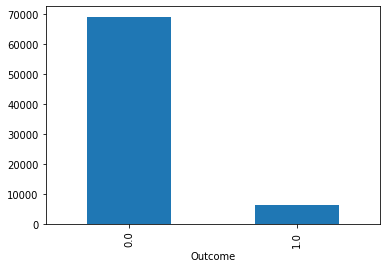

In [293]:
import matplotlib.pyplot as plt
data_train.groupby('Outcome').Outcome.count().plot.bar(ylim=0)
plt.show()

Define X, y and X_test

In [294]:
Patient_ID = data_test.Patient_ID
Health_Camp_ID = data_test.Health_Camp_ID

In [295]:
#define X, y, and X_test
y = data_train['Outcome']
X = data_train.drop(['Patient_ID', 'Health_Camp_ID', 'Outcome', 'Health_Score', 'Number_of_stall_visited','Last_Stall_Visited_Number'], axis=1)
X_test = data_test.drop(['Patient_ID', 'Health_Camp_ID', 'Health_Score','Number_of_stall_visited', 'Last_Stall_Visited_Number'], axis=1)

SMOTE

In [296]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()

X, y = sm.fit_resample(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Split the training set for training and testing

In [297]:
#split train set for testing
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(X, y, test_size=0.10, random_state=1, stratify=y)
X_train.shape, X_val.shape, Y_train.shape, Y_val.shape

((124308, 22), (13812, 22), (124308,), (13812,))

Select Model

In [298]:
#hist gradient boosting regressor
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingClassifier

model = HistGradientBoostingClassifier(loss='binary_crossentropy', max_leaf_nodes=50, learning_rate=0.01, 
                                       max_iter=3000, random_state=1)
best_model=model.fit(X_train, Y_train)

In [299]:
print(model.score(X_train, Y_train))

1.0


In [300]:
y_pred=model.predict(X_val)
y_pred

array([0., 0., 1., ..., 1., 1., 1.])

In [301]:
print(model.score(X_val, Y_val))

1.0


In [302]:
df=pd.DataFrame({'Actual': Y_val, 'Predicted':y_pred})
df

,Actual,Predicted
0,0.0,0.0
1,0.0,0.0
2,1.0,1.0
3,1.0,1.0
4,1.0,1.0
...,...,...
13807,0.0,0.0
13808,0.0,0.0
13809,1.0,1.0
13810,1.0,1.0


In [303]:
y_proba= model.predict_proba(X_val)[:,1]
y_proba

array([1.60649834e-08, 1.60649834e-08, 9.99999984e-01, ...,
       9.99999984e-01, 9.99999984e-01, 9.99999984e-01])

Confusion Matrix

In [304]:
#Create a confusion matrix
from sklearn.metrics import confusion_matrix

#y_val as first argument and the preds as second argument 
confusion_matrix(Y_val, y_pred)

array([[6906,    0],
       [   0, 6906]])

Classification report

In [305]:
#Create classification report
from sklearn.metrics import classification_report

class_report=classification_report(Y_val, y_pred)
print(class_report)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6906
         1.0       1.00      1.00      1.00      6906

    accuracy                           1.00     13812
   macro avg       1.00      1.00      1.00     13812
weighted avg       1.00      1.00      1.00     13812



Make predictions

In [306]:
predictions = model.predict(X_test)
predictions

array([0., 0., 0., ..., 0., 0., 0.])

In [307]:
pred_proba= model.predict_proba(X_test)[:,1]
pred_proba

array([1.60649834e-08, 1.60649834e-08, 1.60649834e-08, ...,
       1.60649834e-08, 1.60649834e-08, 1.60649834e-08])

In [308]:
sample_sub

,Patient_ID,Health_Camp_ID,Outcome
0,505701,6548,0.5
1,500633,6584,0.5
2,506945,6582,0.5
3,497447,6551,0.5
4,496446,6533,0.5
...,...,...,...
35244,507261,6525,0.5
35245,513607,6551,0.5
35246,498160,6584,0.5
35247,502444,6567,0.5


In [309]:
output = pd.DataFrame({'Patient_ID': Patient_ID, 'Health_Camp_ID': Health_Camp_ID,'Outcome': pred_proba})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [310]:
#upload submission
my_submission = pd.read_csv("my_submission.csv")
my_submission

,Patient_ID,Health_Camp_ID,Outcome
0,505701,6548,1.606498e-08
1,500633,6584,1.606498e-08
2,506945,6582,1.606498e-08
3,497447,6551,1.606498e-08
4,496446,6533,1.606498e-08
...,...,...,...
35244,507261,6525,1.606498e-08
35245,513607,6551,1.606498e-08
35246,498160,6584,1.606498e-08
35247,502444,6567,1.606498e-08
